# MINI_PROJECT-1

                                        PROJECT REPORT ON - "DEEP LEARNING"

                         TITLE - "Image Classification Using Deep Learning Neural Network"

                                                 SUBMITTED BY:
                                              Name: Vijay Gurung
                                             ( Data Science Intern )
                                              ( ID : MST03-0070 )

This project focuses on developing an image classification model aimed at identifying and categorizing images of "Fruits and vegetables".

By leveraging the power of deep learning frameworks like "TensorFlow and Keras", a "Convolutional Neural Network (CNN)" is constructed and trained
on a comprehensive dataset.The Convolutional Neural Networks (CNNs) is designed to automatically learn and extract intricate features from the images, 
enabling it to achieve high accuracy in distinguishing between various categories of fruits and vegetables.

The model is designed to provide accuracy estimates for specific categories,allowing us to understand how well it can identify 
individual "Fruits and Vegetables".

For Example:

When testing an Fruit image of an "Apple", the models accuracy in correctly classifying it as a fruit is determined,
whereas testing an vegetable image of "Cabbage" measures its accuracy as a vegetable. We also compare the overall accuracy between the 
"Fruit and vegetable" categories, providing an accuracy percentage for each.

To demonstrate the model's effectiveness in real-world scenarios, we evaluated it using new images sourced from Google.

We conducted tests with four specific categories to assess the model's accuracy:

1.Apple: 99%
2.Cabbage: 58%
3.Banana: 91%
4.Chilli Pepper: 99%

The final results indicate that the model achieved the highest accuracy with "Chilli Pepper and Apple", while "Banana" had slightly lower accuracy. 
However, the model struggled with "Cabbage", reflecting a significant drop in accuracy.

# Install Dependencies and setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [13]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [15]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 341 files belonging to 36 classes.


In [17]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


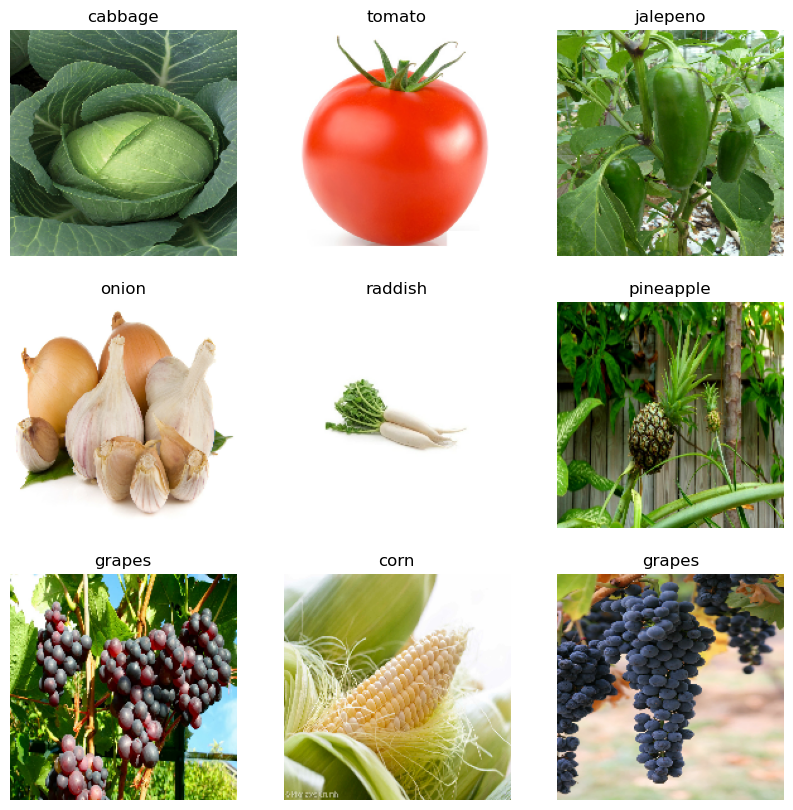

In [19]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
from tensorflow.keras.models import Sequential

In [23]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [27]:
# Compile the model

In [29]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
# Train the model

In [33]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.0690 - loss: 4.1577 - val_accuracy: 0.3930 - val_loss: 2.3090
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 550ms/step - accuracy: 0.2846 - loss: 2.4678 - val_accuracy: 0.5103 - val_loss: 1.7608
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 616ms/step - accuracy: 0.4388 - loss: 1.9673 - val_accuracy: 0.7859 - val_loss: 0.9225
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 613ms/step - accuracy: 0.6141 - loss: 1.3382 - val_accuracy: 0.8622 - val_loss: 0.6501
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 634ms/step - accuracy: 0.7645 - loss: 0.8272 - val_accuracy: 0.8768 - val_loss: 0.5369
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 559ms/step - accuracy: 0.8325 - loss: 0.5513 - val_accuracy: 0.9120 - val_loss: 0.5422
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 568ms/step - accuracy: 0.9091 - loss: 0.3522 - val_accuracy: 0.9326 - val_loss: 0.4001
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 582ms/step - accuracy: 0.9264 - loss: 0.2835 - val_accu

In [35]:
# Plot Training History

Text(0.5, 1.0, 'Loss')

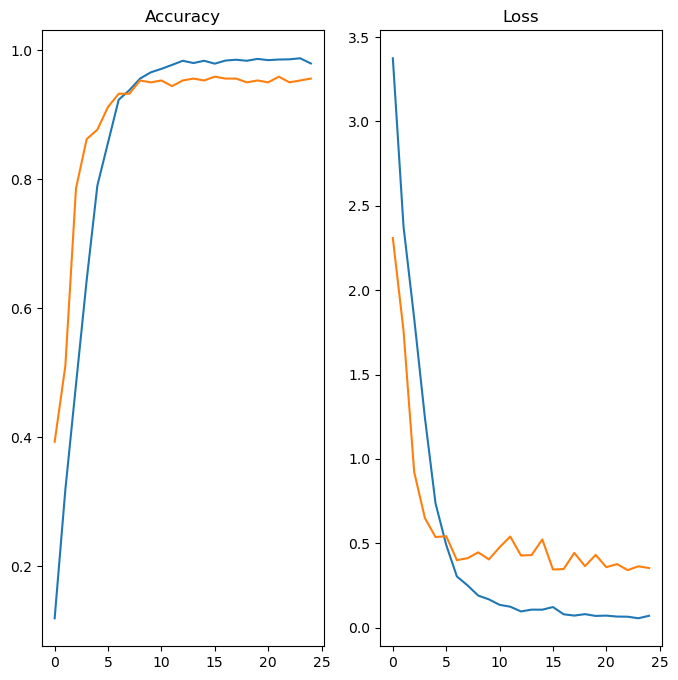

In [37]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [39]:
# Load and Predict New Image

#  Just for Example i have taken 1 fruits and 1 Vegetables

In [41]:
# (A) Fruit = APPLE 

In [43]:
image = 'Fruits_Vegetables/Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image) 
img_bat=tf.expand_dims(img_arr,0)

In [45]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [47]:
score = tf.nn.softmax(predict)

In [49]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.99


In [51]:
# (B) VEGETABLE = CABBAGE

In [53]:
image = 'Fruits_Vegetables/cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image) 
img_bat=tf.expand_dims(img_arr,0)

In [55]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [57]:
score = tf.nn.softmax(predict)

In [59]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lettuce with accuracy of 55.12


In [61]:
# Save the Model

In [63]:
model.save('Image_classify.keras')

# Streamlit

Instructions for Running Streamlit Code:

The code below can be run in Streamlit on any IDE platform. In this example, I have used "PyCharm".

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import streamlit as st
import numpy as np

# Streamlit header
st.header("Project1_Deep_Learning_Image_Classification")

# Load the model
model = load_model(r'C:\Users\DELL\Music\My Image classification Proejct Code\Image_classify.keras')


# List of categories
data_cat = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower',
    'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
    'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas',
    'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
    'sweetpotato', 'tomato', 'turnip', 'watermelon'
]

# Define image dimensions
image_height = 180
image_width = 180
image = st.text_input ('Enter Image name','Apple.jpg')

# Load and preprocess the image
image = tf.keras.utils.load_img(image, target_size=(image_height, image_width))
img_arr = tf.keras.utils.img_to_array(image)  # Fixing the method used here
img_bat = tf.expand_dims(img_arr, 0)  # Adding batch dimension

# Predict the class of the image
predict = model.predict(img_bat)

# Apply softmax to the prediction scores
score = tf.nn.softmax(predict)
st.image(image, width=200)
# Display the image and prediction results
st.image(image)
st.write('veg/Fruit in image is ' + data_cat[np.argmax(score)])
st.write('with accuracy of ' + str(np.max(score)*100))

In [27]:
#To execute the code, run the following commands in the terminal:


1st step :

cd "C:\Users\DELL\Music\My Image classification Proejct Code"

2nd Step :

streamlit run my_mini_project.py

Below some sample name can try to  

1.Apple 

2.Banana

3.Corn

4.cabbage

5.chilli
